In [84]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(X.shape)
print(original_label.shape)

(1500, 2)
(1500,)


In [18]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
# return index of the closest centroid
    return np.argmin(D, axis = 1)
def has_converged(centroids, new_centroids):
    # return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) ==
        set([tuple(a) for a in new_centroids]))
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
# collect all points that are assigned to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0) # then take average
    return centroids

In [20]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

In [88]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
#kmeans_display(X, labels[-1])
print(it)
print(labels[-1])

Centers found by our algorithm:
 [[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
7
[1 0 0 ... 1 1 1]


In [90]:
import matplotlib.pyplot as plt

def kmeans_display(X, labels):
    K = np.max(labels) + 1  # Số lượng cụm
    for k in range(K):
        # Lấy tất cả các điểm dữ liệu thuộc cụm thứ k
        Xk = X[labels == k, :]
        plt.scatter(Xk[:, 0], Xk[:, 1], label=f'Cluster {k}')  # Vẽ các điểm của cụm k
    
    plt.legend()
    plt.show()

Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [3.02521978 5.94885115]
 [1.98112961 1.95794411]]


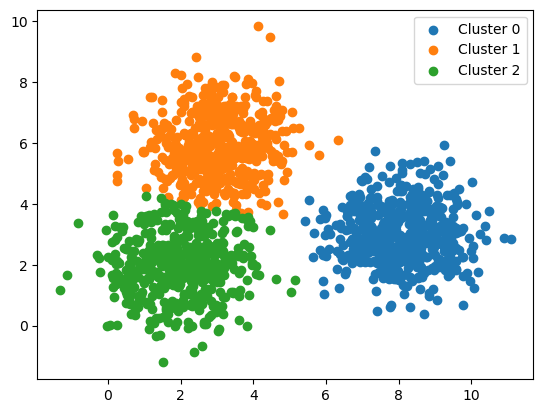

In [92]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)

### Phan nhom chu so viet tay

In [98]:
from __future__ import print_function
import numpy as np
from sklearn.datasets import fetch_openml  # Dùng fetch_openml thay cho fetch_mldata
mnist = fetch_openml('mnist_784', version=1)  # Thay thế tên 'MNIST original' bằng 'mnist_784'
X, y = mnist["data"], mnist["target"]

print(X.shape)  
print(y.shape)

(70000, 784)
(70000,)


In [108]:
from __future__ import print_function
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans

# Tải tập dữ liệu MNIST từ OpenML
mnist = fetch_openml('mnist_784', version=1)

K = 10  # số lượng cụm
N = min(10000, mnist.data.shape[0])  # Đảm bảo không lấy quá số lượng điểm dữ liệu có sẵn

# Sử dụng np.random.choice để lấy các chỉ số ngẫu nhiên
random_indices = np.random.choice(mnist.data.shape[0], N, replace=False)
X = mnist.data.iloc[random_indices]  # Sử dụng .iloc để lấy các hàng tương ứng

# Thực hiện KMeans
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)  # Thêm random_state để tái lập kết quả
pred_label = kmeans.predict(X)  # Dự đoán nhãn cho các điểm dữ liệu

# In ra thông tin
print("Shape of predicted labels:", pred_label)
print("Centroids found by KMeans:\n", kmeans.cluster_centers_.shape)

Shape of predicted labels: [5 8 9 ... 8 2 6]
Centroids found by KMeans:
 (10, 784)
